<a href="https://colab.research.google.com/github/Tintinnit/Quantum-Spin-Measurement/blob/main/QSYS_Programming_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

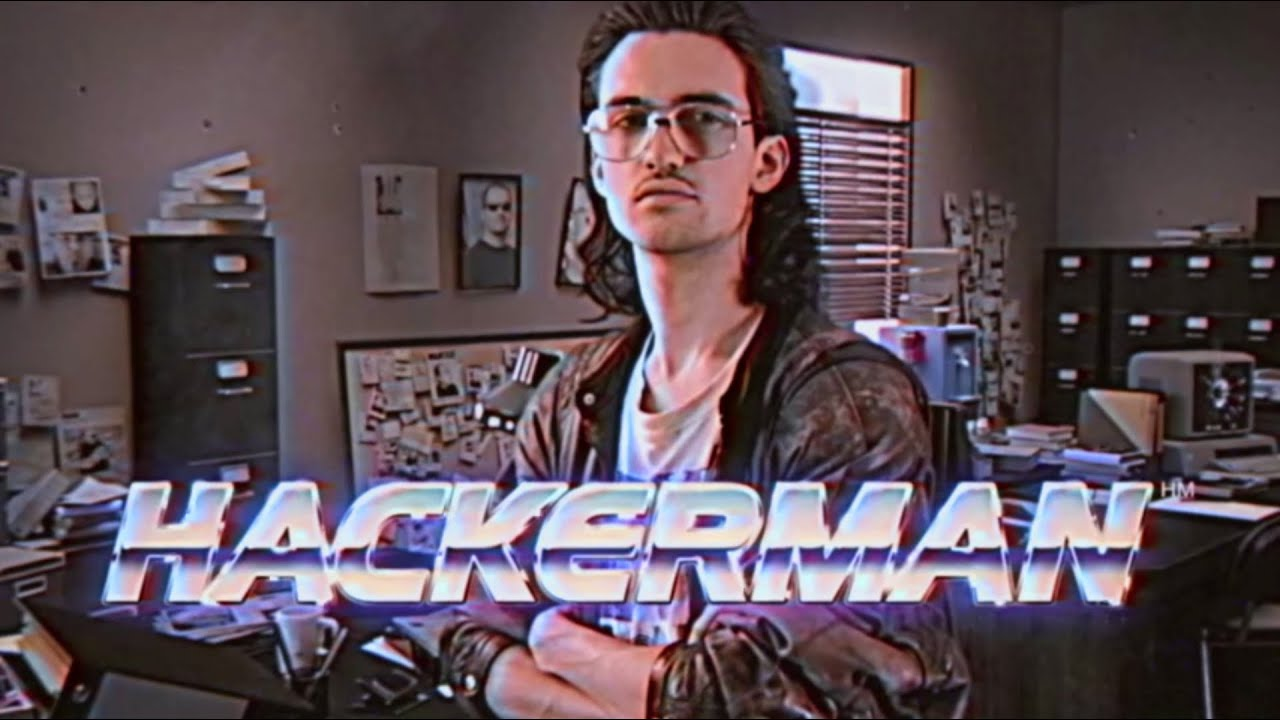



Welcome to your quantum programming lab!

It's time to get out of the theory and into the real work of programming a quantum circuit. Today we will be using the Python package Pennylane (one of many) to code the simplest quantum circuit possible - a superposition circuit!

Once we understand superposition and how to measure both probability amplitudes and operator average values (expectation values) - wew will put everything together into a basic variational circuit!

In [1]:
!pip install pennylane

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.3/48.3 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 53.3 MB/s eta 0:00:00
  Attempting uninstall: autograd
    Found existing installation: autograd 1.6.2
    Uninstalling autograd-1.6.2:
      Successfully uninstalled autograd-1.6.2


 Now that we have installed Pennylane, its time to import the packages we will need to write our program.

In [2]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt



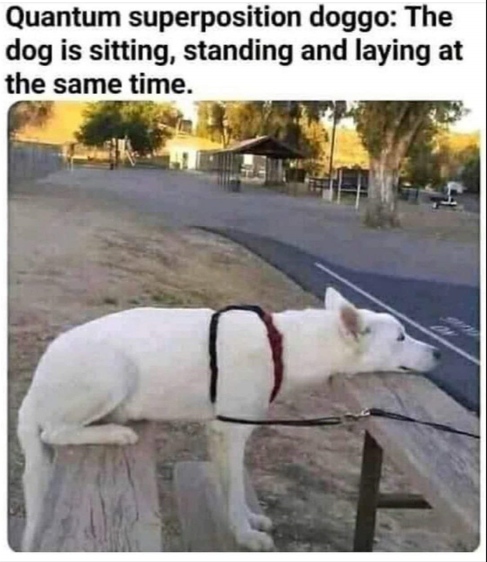

Here is a simple program which places a single qubit into superposition and then measures that superposition ten times (in the standard basis).

In [16]:
#--------------------
#Starting parameters
#--------------------
qubits = 1
#run program on a single qubit backend
s = 10
#send 10 measurements 'shots' to the backend

#--------------------
#Create Device on Backend for Quantum Algorithm
#--------------------
dev = qml.device("default.qubit", wires=qubits, shots = s)
#quantum device running on 'default.qubit' classical simulator with specified number fo qubits and shots
@qml.qnode(dev)
#activate device and apply to the following circuit

#--------------------
#Create quantum algorithm
#--------------------
def superposition():
#define superposition circuit
    qml.Hadamard(wires = 0)
#apply a single superposition 'Hadamard' gate to qubit 0
    return qml.probs()
#output the measurement probabilities calculated over s measurements where s is defined above

How could you modify this program to perform a single measurement?

In [39]:
superposition()
#run superposition circuit

tensor([0.55, 0.  , 0.45, 0.  ], requires_grad=True)

Let's visualize what we have done on a graph.

Try running this module several times and draw each output (are they supposed to be different?!?!?!)

Text(0.5, 1.0, 'bit probability amplitudes')

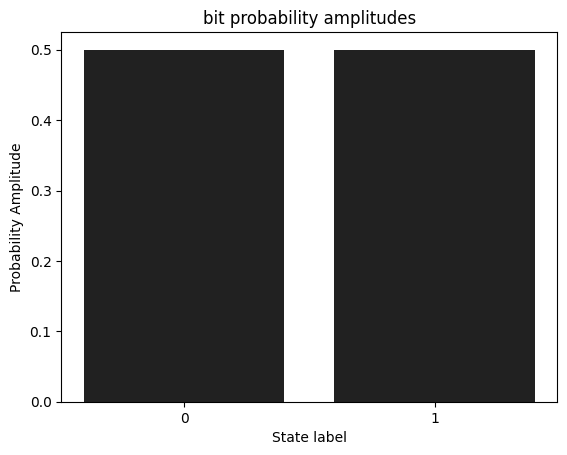

In [56]:
#--------------------
#Generate plot
#--------------------
y = superposition()
#store output of circuit as vector
bit_strings = [f"{x:0{qubits}b}" for x in range(len(y))]
#generate bit strings equal to length of output
plt.bar(bit_strings, y, color = "#212121")
plt.xlabel("State label")
plt.ylabel("Probability Amplitude")
plt.title("bit probability amplitudes")

Problem 1

Now it's your turn!

Modify the superposition code so that it creates a superposition over all bit strings of length $n = 5$

In [55]:
#---------------------------
#Modify this code!
#---------------------------

qubits = 1
#run program on a single qubit backend
s = 10
#send 10 measurements 'shots' to the backend

#--------------------
#Create Device on Backend for Quantum Algorithm
#--------------------
dev = qml.device("default.qubit", wires=qubits, shots = s)
#quantum device running on 'default.qubit' classical simulator with specified number fo qubits and shots
@qml.qnode(dev)
#activate device and apply to the following circuit

#--------------------
#Create quantum algorithm
#--------------------
def superposition():
#define superposition circuit
    qml.Hadamard(wires = 0)
#apply a single superposition 'Hadamard' gate to qubit 0
    return qml.probs()
#output the measurement probabilities calculated over s measurements where s is defined above

Problem 2a:

Now let's modify our code to compute the expectation value of the Pauli Z operator. If you solved the bonus problem you can try to calculate the expectation value of $Z^{\otimes n}$ for $n = 5$

To find the correct pennylane syntax for expectation value, simply google it :D



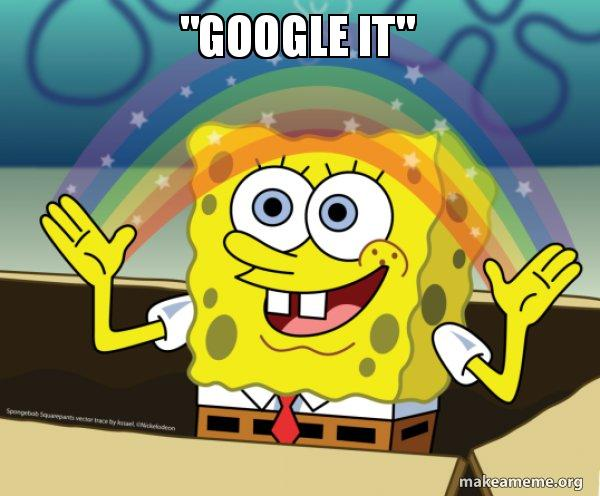

In [101]:
#--------------------
#Modify this code!
#--------------------

qubits = 1
#run program on a single qubit backend
s = 10
#send 10 measurements 'shots' to the backend

#--------------------
#Create Device on Backend for Quantum Algorithm
#--------------------
dev = qml.device("default.qubit", wires=qubits, shots = s)
#quantum device running on 'default.qubit' classical simulator with specified number fo qubits and shots
@qml.qnode(dev)
#activate device and apply to the following circuit

#--------------------
#Create quantum algorithm
#--------------------
def superposition():
#define superposition circuit
    qml.Hadamard(wires = 0)
#apply a single superposition 'Hadamard' gate to qubit 0
    return qml.expval(qml.PauliZ(0))
#output the measurement probabilities calculated over s measurements where s is defined above

print(superposition())

-0.4


Problem 2b:

For a given qubit, what do you think the expectation value should be?

Hint:
Does the answer depend on the fact that we used the Hadamard $H$ operator prior to measurement?

Problem 3:

Modify the following code from PennyLane's single qubit rotation tutorial to optimize the expectation value Pauli $X$

In [102]:
#--------------------
#Modify this code!
#--------------------

dev1 = qml.device("lightning.qubit", wires=1)
@qml.qnode(dev1, interface="autograd")

def circuit(params):
    qml.RX(params[0], wires=0)
    qml.RY(params[1], wires=0)
    return qml.expval(qml.PauliZ(0))

def cost(x):
    return circuit(x)

In [105]:
init_params = np.array([0.011, 0.012], requires_grad=True)
print(cost(init_params))

0.011998986026817763


In [ ]:
# initialise the optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.4)

# set the number of steps
steps = 100
# set the initial parameter values
params = init_params

for i in range(steps):
    # update the circuit parameters
    params = opt.step(cost, params)

    if (i + 1) % 5 == 0:
        print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(params)))

print("Optimized rotation angles: {}".format(params))

Cost after step     5:  0.9961778
Cost after step    10:  0.8974944
Cost after step    15:  0.1440490
Cost after step    20: -0.1536720
Cost after step    25: -0.9152496
Cost after step    30: -0.9994046
Cost after step    35: -0.9999964
Cost after step    40: -1.0000000
Cost after step    45: -1.0000000
Cost after step    50: -1.0000000
Cost after step    55: -1.0000000
Cost after step    60: -1.0000000
Cost after step    65: -1.0000000
Cost after step    70: -1.0000000
Cost after step    75: -1.0000000
Cost after step    80: -1.0000000
Cost after step    85: -1.0000000
Cost after step    90: -1.0000000
Cost after step    95: -1.0000000
Cost after step   100: -1.0000000
Optimized rotation angles: [9.32189481e-17 3.14159265e+00]


Problem 3 (BONUS):

Modify the above circuit from PennyLane's single qubit rotation tutorial to optimize the expectation value Pauli $X$

###WITHOUT CHANGING THE RETURN LINE###
(return qml.expval(qml.PauliZ(0)))

